## A Multilayer Feedforward Perceptron Model in Neural Networks for Predicting Stock Market Short‑term Trends

In [1]:
# importing the neccesary libraries

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# draw the plots immediately after the current cell
%matplotlib inline

# load seaborn's default theme and color palette to the session
sns.set()

# For reading stock data from yahoo
import yfinance as yf
from pandas_datareader import data as pdr

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-17,134.559998,135.619995,133.210007,133.559998,133.559998,48450200,AMAZON
2023-07-18,132.710007,133.860001,131.350006,132.830002,132.830002,54969100,AMAZON
2023-07-19,133.389999,135.990005,132.529999,135.360001,135.360001,54531000,AMAZON
2023-07-20,134.070007,134.789993,129.330002,129.960007,129.960007,59820600,AMAZON
2023-07-21,131.339996,131.369995,128.419998,130.000000,130.000000,133265000,AMAZON
2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100,AMAZON
2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700,AMAZON
2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100,AMAZON
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,AMAZON


In [2]:
# Get the stock quote
df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-07-24,121.926003,123.349998,121.379997,121.879997,121.879997,22276100
2023-07-25,121.879997,123.690002,121.529999,122.790001,122.790001,31820800
2023-07-26,130.360001,131.369995,128.710007,129.660004,129.660004,46216900


In [3]:
# A new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on i.e 80%
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

2329

In [4]:
# Scale the data importing Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom


# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataset)

# Create and train the Self-Organizing Map (SOM)
som_grid_size = (10, 10)  # Example: 10x10 grid
som = MiniSom(som_grid_size[0], som_grid_size[1], scaled_features.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_features)
som.train_random(scaled_features, num_iteration=1000)

# The clustered data from the SOM
# clustered_data = np.zeros(scaled_features.shape[0:int(training_data_len)])
clustered_data = np.zeros(scaled_features.shape[0], dtype=int)
# clustered_data = scaled_features[0:int(training_data_len), :]
for i, x in enumerate(clustered_data):
    w = som.winner(x)
    clustered_data[i] = w[0] * som_grid_size[0] + w[1]

# Create the training data set 
train_data = scaled_features[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets

# train_data
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
# print(x_train.shape[0])
# print(x_train.shape[1])


[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.0049054 , 0.00481982, 0.00398405,
       0.00190098, 0.00164788, 0.00381107, 0.00339409, 0.00383474])]
[0.003965839473671101]

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.0049054 , 0.00481982, 0.00398405,
       0.00190098, 0.00164788, 0.00381107, 0.00339409, 0.00383474]), array([0.01988927, 0.01820133, 0.01656439, 0.01154608, 0.0116699 ,
       0.01218339, 0.01285346, 0.01200676, 0.01266045, 0.01344889,
       0.01466158, 0.0049054 , 0.00481982, 0.00398405, 0.00190098,
       0.00164788, 0.00381107, 0.00339409, 0.00383474, 0.00396584])]
[0.003965839473671101, 0.004745163624257073]



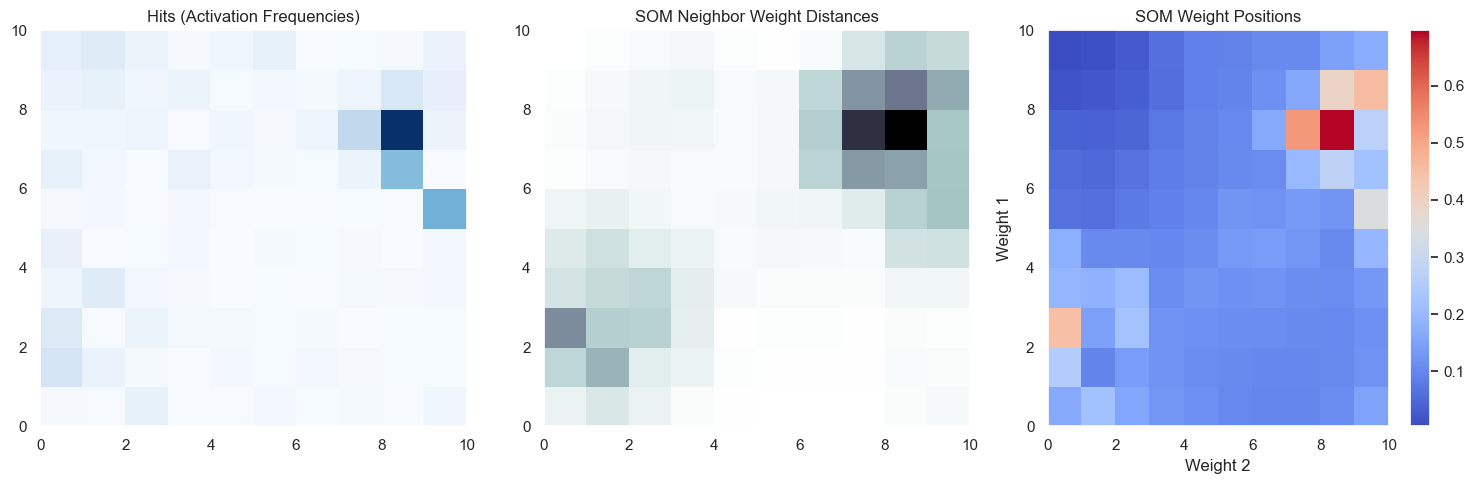

In [5]:
# Plot the Hits (Activation Frequencies) of each neuron
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.pcolor(som.activation_response(scaled_features).T, cmap='Blues')
plt.colormaps()
plt.title('Hits (Activation Frequencies)')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')

# Plot the SOM neighbor weight distances
plt.subplot(132)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colormaps()
plt.title('SOM Neighbor Weight Distances')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')

# Plot the SOM weight positions
plt.subplot(133)
plt.pcolor(som.get_weights()[..., 0].T, cmap='coolwarm')
plt.colorbar()
plt.title('SOM Weight Positions')
plt.xlabel('Weight 2')
plt.ylabel('Weight 1')

plt.tight_layout()
plt.show()

In [6]:
# Build the MLP model with 3 hidden layers
# P.H1.H2.H3.Q, describes the architecture of an MLP with three hidden layers
# With the help of functional API,  
input_layer = tf.keras.Input(shape = (20,))
hidden1 = tf.keras.layers.Dense(30, activation='sigmoid')(input_layer)
hidden2 = tf.keras.layers.Dense(32, activation='sigmoid')(hidden1)
hidden3 = tf.keras.layers.Dense(1, activation='tanh')(hidden2)
concat = tf.keras.layers.Concatenate()([input_layer, hidden3])
output_layer = tf.keras.layers.Dense(1)(concat)

model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# batch_size --> the hyperparameter of gradient descent that controls the 
# number of training samples to work through before the model’s internal parameters are updated
# epochs --> the hyperparameter of gradient descent that controls the number of complete passes through the training dataset
model.fit(x_train, y_train, batch_size=32, epochs=100)
# model.fit(x_train, y_train, epochs=1, batch_size=1, validation_split=0.2)


Epoch 1/100
73/73 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 9.1087e-04
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 6.4483e-04
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 6.2755e-04
Epoch 5/100
73/73 [==============================] - 0s 2ms/step - loss: 6.1889e-04
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 6.1269e-04
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 5.9852e-04
Epoch 8/100
73/73 [==============================] - 0s 2ms/step - loss: 5.8571e-04
Epoch 9/100
73/73 [==============================] - 0s 2ms/step - loss: 5.8920e-04
Epoch 10/100
73/73 [==============================] - 0s 2ms/step - loss: 5.7026e-04
Epoch 11/100
73/73 [==============================] - 0s 2ms/step - loss: 5.5555e-04
Epoch 12/100
73/73 [==============================] - 0s 2ms/step - loss: 5.50

In [22]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           630         ['input_3[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 32)           992         ['dense_8[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 1)            33          ['dense_9[0][0]']                
                                                                                            

In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
# test_data = scaled_data[training_data_len - 20: , :]
test_data = scaled_features[training_data_len - 20: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# # Get the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# rmse

19/19 [==============================] - 0s 2ms/step


C:\Users\AKTECH COMPUTER SYST\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


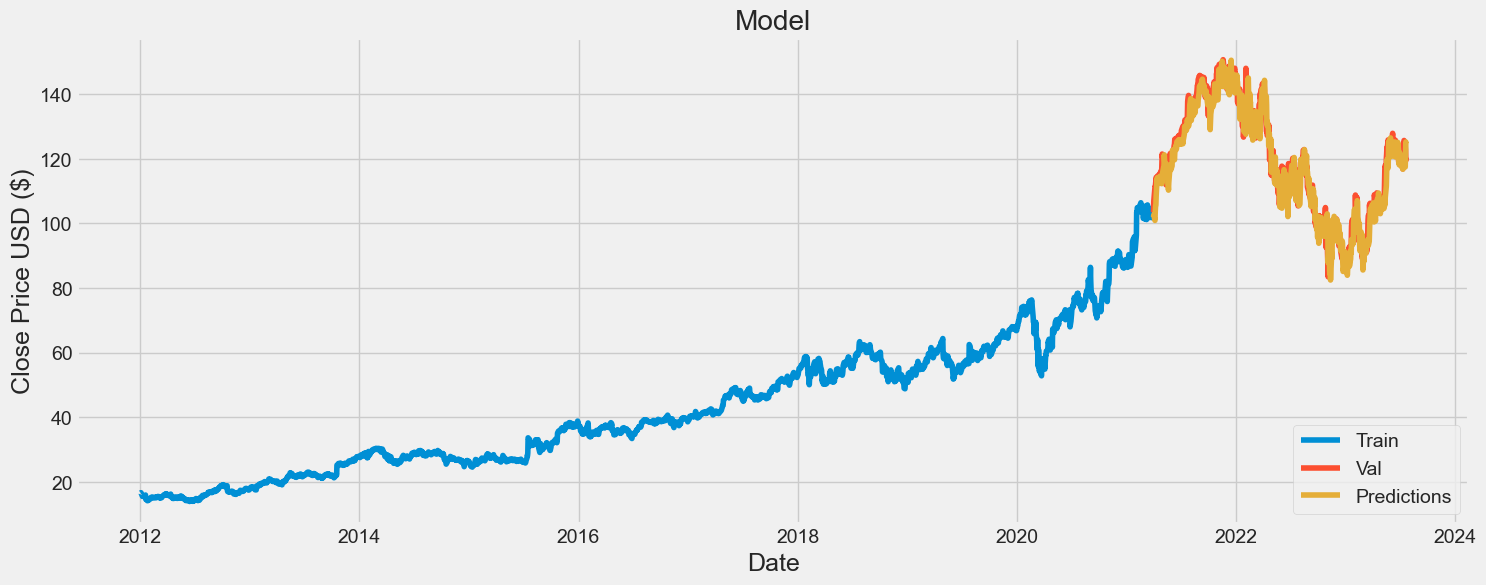

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-03-31,103.431503,102.009476
2021-04-01,106.887497,102.662376
2021-04-05,111.277496,100.930519
2021-04-06,111.237503,103.785583
2021-04-07,112.484001,105.449272
...,...,...
2023-07-17,125.059998,117.915833
2023-07-18,124.080002,117.475533
2023-07-19,122.779999,121.813438
